In [1]:
#Importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler,OneHotEncoder,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [2]:
#loading dataset
df = pd.read_csv("ToyotaCorolla - MLR.csv")

#EDA
print("\nBasic Descriptive Stats :",df.describe())
print("\nInfo :",df.info())
print("\nShape of data :",df.shape)
print("\nColumns :",df.columns.tolist())
print("\nFirst 5 rows :",df.head())
print("\nMissing values per column :",df.isnull().sum())



Basic Descriptive Stats :               Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  

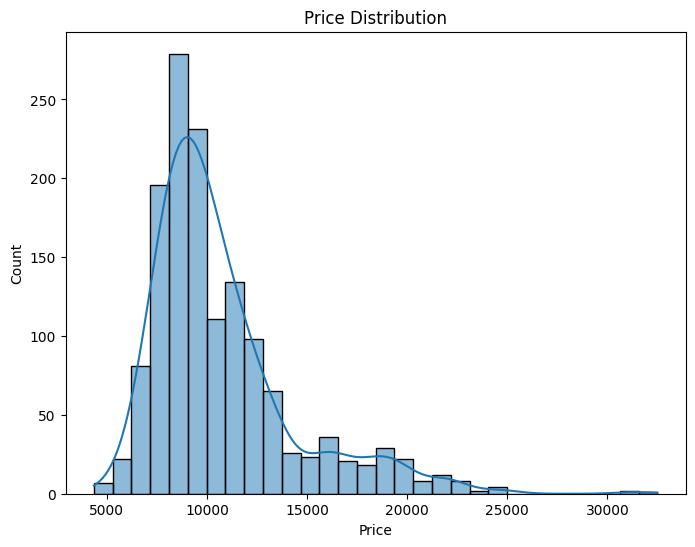

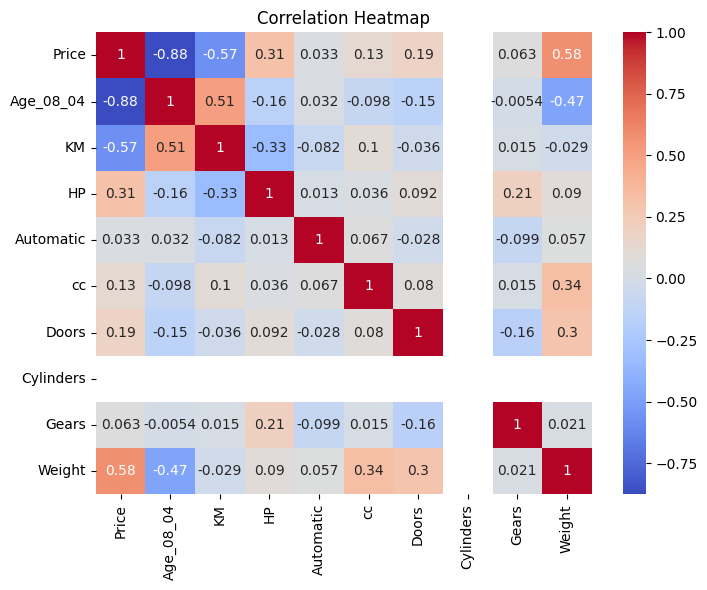

In [3]:
#Visualize Price Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Price'],bins=30,kde=True)
plt.title("Price Distribution")
plt.show()


#Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [4]:
#Data Preprocessing
df = pd.get_dummies(df,columns=['Fuel_Type'],drop_first=True)
df['Automatic']=df['Automatic'].replace({'Yes':1,'No':0})
df['Doors']=pd.to_numeric(df['Doors'],errors='coerce')

df.dropna(inplace=True)

X = df.drop('Price',axis=1)
y = df['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:

#Train-Test Split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

#Model 1 : Linear Regression

print("\nModel 1: Linear Regression :\n")
print("R2_score :",r2_score(y_test,y_pred))
print("RMSE :",mean_squared_error(y_test,y_pred))
print("MAE :",mean_absolute_error(y_test,y_pred))

#Model 2 : Lasso Regression

lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)

print("\nModel 2 : Lasso Regression :\n")
print("R2-Score :",r2_score(y_test,y_pred_lasso))
print("RMSE :",mean_squared_error(y_test,y_pred_lasso))
print("MAE :",mean_absolute_error(y_test,y_pred_lasso))

#Model 3 : Ridge Regression

ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)
y_pred_ridge = ridge.predict(X_test)

print("\nModel 3 : Ridge Regression :\n")
print("R2-Score :",r2_score(y_test,y_pred_ridge))
print("RMSE :",mean_squared_error(y_test,y_pred_ridge))
print("MAE :",mean_absolute_error(y_test,y_pred_ridge))


#Coefficients of Linear Regression
coef_df = pd.DataFrame({'Feature':X.columns, 'Coefficient':lr.coef_})
print("\nLinear Regression Coefficient :")
display(coef_df.sort_values(by = 'Coefficient',key=abs,ascending=False))


#Notes

print("""
Notes:
- Dropped rows with missing values for simplicity.
- FuelType converted to dummy variables.
- Features standardized for fair comparison (important for Lasso/Ridge).
- Positive coefficient -> increase in Price if feature increases.
- Negative coefficient -> decrease in Price if feature increases.
""")


Model 1: Linear Regression :

R2_score : 0.834888804061108
RMSE : 2203043.823143705
MAE : 990.8872739193968

Model 2 : Lasso Regression :

R2-Score : 0.8348911358891582
RMSE : 2203012.710054413
MAE : 990.8885614047144

Model 3 : Ridge Regression :

R2-Score : 0.8348905895868741
RMSE : 2203019.9992504334
MAE : 990.8870682150529

Linear Regression Coefficient :


,Feature,Coefficient
0,Age_08_04,-2.246662e+03
8,Weight,1.362139e+03
1,KM,-6.085706e+02
10,Fuel_Type_Petrol,4.451027e+02
2,HP,2.102533e+02
7,Gears,1.039463e+02
5,Doors,-5.743684e+01
3,Automatic,3.413608e+01
9,Fuel_Type_Diesel,-2.127088e+01
4,cc,-1.288507e+01



Notes:
- Dropped rows with missing values for simplicity.
- FuelType converted to dummy variables.
- Features standardized for fair comparison (important for Lasso/Ridge).
- Positive coefficient -> increase in Price if feature increases.
- Negative coefficient -> decrease in Price if feature increases.



In [ ]:
"""1. What is Normalization & Standardization and how is it helpful? (10 lines)

Normalization means scaling all values of a feature between a fixed range, usually 0 to 1.

It is useful when data has different units or large value differences.

Normalization helps algorithms like k-NN, neural networks, and clustering perform better.

It ensures no feature dominates others because of large numbers.

Standardization transforms data so that it has mean = 0 and standard deviation = 1.

It works well when data follows a normal distribution.

Standardization is commonly used in linear regression, logistic regression, SVMs, PCA.

It makes optimization algorithms converge faster.

Both techniques help models learn more efficiently.

They improve accuracy, stability, and training speed.

2. What techniques can be used to address multicollinearity in multiple linear regression? (10 lines)

Multicollinearity occurs when two or more predictors are highly correlated.

It results in unstable coefficients and unreliable predictions.

One technique is to remove one of the correlated variables.

Another solution is to combine correlated variables (e.g., via averaging).

Use Principal Component Analysis (PCA) to convert correlated variables into independent components.

Apply Regularization techniques like Ridge Regression or Lasso Regression.

Lasso can remove irrelevant features automatically.

Ridge reduces coefficient variance by shrinking them.

Check Variance Inflation Factor (VIF) to detect which variable is causing multicollinearity.

Select features with low VIF to improve model stability."""